# Эффект Рамзауэра
### Бутаков Иван, Гладков Андрей; Б05-871

Цель работы: изучение рассеяния медленных электронов на атомах.

Оборудование: тиратрон с инертным газом, источник тока, мультиметр.

## Теоретическая часть

В данной работе наблюдается явление, необъяснимое в рамках классической физики - эффект "прозрачности" атомов для налетающих электронов, проявляющийся в виде наличия перегиба (а также локального максимума и минимума) на графике вольт-амперной характеристики лампы с инертным газом.

В рамках работы происходит качественное наблюдение за ВАХ лампы, а также точный промер данной кривой. На основе полученных данных рассчитывается глубина и ширина потенциальной ямы атома. Попутно делается вывод о составе газа внутри лампы.

## Импортирование данных

In [1]:
import pandas
import numpy

In [2]:
# Опыты.
data_2_5V = pandas.read_csv('2.5V.csv', delim_whitespace=True, header = 0, comment='#', dtype = numpy.float64)
data_3V = pandas.read_csv('3V.csv', delim_whitespace=True, header = 0, comment='#', dtype = numpy.float64)

### Обозначения

$ U $ - приложенное напряжение в вольтах, $ I $ - измеренный ток в амперах.

In [3]:
data_2_5V

,U,I
0,0.010,-0.00080
1,2.397,0.00002
2,2.543,0.00040
3,3.008,0.00983
4,3.515,0.01859
5,4.003,0.02116
6,4.518,0.02165
7,5.014,0.02086
8,5.507,0.01976
9,6.005,0.01892


In [4]:
data_3V

,U,I
0,0.000,-0.00010
1,1.001,-0.00010
2,2.014,-0.00007
3,2.128,0.00001
4,2.490,0.00405
5,3.018,0.03800
6,3.514,0.06000
7,4.008,0.06924
8,5.023,0.07701
9,5.512,0.07767


In [5]:
# Погрешность
delta_U = 0.01
delta_I = 0.0001

In [6]:
# Результаты измерений в динамическом режиме.
din_data_2_5V = pandas.read_csv('2.5V.txt', delim_whitespace=True, header = 0, comment='#', dtype = numpy.float64)
din_data_3V = pandas.read_csv('3V.txt', delim_whitespace=True, header = 0, comment='#', dtype = numpy.float64)

Формат данных:
0. Нижний минимум.
1. Нижний максимум.
2. Верхний минимум.
3. Верхний максимум.
4. Скачок, подножье.
5. Скачок, верхняя точка.

In [7]:
din_data_2_5V

,X,Y
0,-10.0,0.003
1,-3.0,0.010
2,-12.0,0.010
3,-5.0,0.017
4,-16.0,0.012
5,-20.0,0.020


In [8]:
din_data_3V

,"X,",Y
0,9.0,0.040
1,4.6,0.060
2,9.8,0.052
3,5.8,0.072
4,13.0,0.060
5,20.0,0.240


### Обработка данных динамического режима

In [9]:
# Постоянная планка.
h = 6.626e-34
h_ev = 4.135e-15

# Заряд электрона.
e = 1.602e-19

# Масса электрона.
m = 9.11e-31

$$
l = \frac{h \sqrt{5}}{4 \sqrt{2m \cdot (E_2 - E_1)}}
$$

In [10]:
def get_potential_well_size(E_1, E_2, m, delta_E_1 = 0.0, delta_E_2 = 0.0):
    l = (h * numpy.sqrt(5)) / (4 * numpy.sqrt(2 * m * (E_2 - E_1)))
    delta_l = 0.5 * l * (delta_E_1 + delta_E_2) / (E_1 + E_2)
    return l, delta_l

In [11]:
U_2 = 11 # Минимум.
U_1 = 4  # Максимум.

l_est, _ = get_potential_well_size(U_1 * e, U_2 * e, m)
print("Оценка радиуса электронной оболочки: %.2e м" % l_est)

Оценка радиуса электронной оболочки: 2.59e-10 м


$$
U_0 = \frac{1}{5}(4 E_2 - 9 E_1)
$$

In [12]:
def get_potential_well_depth(E_1, E_2, delta_E_1 = 0.0, delta_E_2 = 0.0):
    U_0 = (4 * E_2 - 9 * E_1) / 5
    delta_U_0 = (4 * delta_E_2 + 9 * delta_E_1) / 5
    return U_0, delta_U_0

In [13]:
U_0_est, _ = get_potential_well_depth(U_1 * e, U_2 * e)
U_0_est /= e
print("Оценка глубины потенциальной ямы: %.2e эВ" % U_0_est)

Оценка глубины потенциальной ямы: 1.60e+00 эВ


In [14]:
I_ion_est = (13 + 16) / 2
print("Оценка ионизационного потенциала: %.1f эВ" % I_ion_est)

Оценка ионизационного потенциала: 14.5 эВ


Судя по оценке потенциала ионизации, в лампе находится криптон (энергия ионизации - $ 14 $ эВ).

### График ВАХ в статическом режиме

In [15]:
import matplotlib
from matplotlib import pyplot as plt

font = {'family' : 'Liberation Sans',
        'weight' : 'normal',
        'size'   : 16}

In [16]:
matplotlib.rc('font', **font)

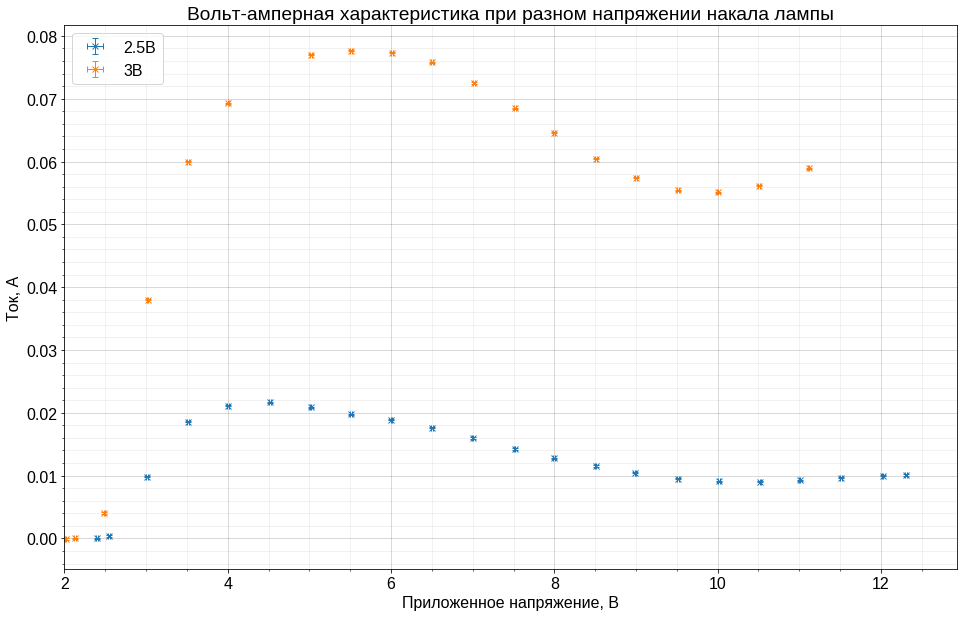

In [17]:
fig, ax = plt.subplots()

ax.set_title("Вольт-амперная характеристика при разном напряжении накала лампы")

fig.set_figheight(10)
fig.set_figwidth(16)

#ax.set_xscale('log', basex=10)
#ax.set_yscale('log', basey=10)

ax.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
ax.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.errorbar(data_2_5V['U'], data_2_5V['I'], xerr = delta_U, yerr = delta_I,
            ls = '', lw = 1.0, marker = 'x', solid_capstyle='projecting', capsize = 3, label = '2.5В')

ax.errorbar(data_3V['U'], data_3V['I'], xerr = delta_U, yerr = delta_I,
            ls = '', lw = 1.0, marker = 'x', solid_capstyle='projecting', capsize = 3, label = '3В')

ax.set_xlim(left = 2.0)

ax.set_xlabel('Приложенное напряжение, В')
ax.set_ylabel('Ток, А')

ax.legend(loc='upper left')
plt.show();

### Обработка данных статического режима

In [18]:
# Уберем начальную фазу роста.
treshold = 3.5
data_2_5V_cropped = data_2_5V[data_2_5V['U'] > treshold]
data_3V_cropped = data_3V[data_3V['U'] > treshold]

In [19]:
data_2_5V_cropped

,U,I
4,3.515,0.01859
5,4.003,0.02116
6,4.518,0.02165
7,5.014,0.02086
8,5.507,0.01976
9,6.005,0.01892
10,6.498,0.01763
11,6.999,0.01598
12,7.513,0.01425
13,7.995,0.01275


In [20]:
data_3V_cropped

,U,I
6,3.514,0.06000
7,4.008,0.06924
8,5.023,0.07701
9,5.512,0.07767
10,6.009,0.07730
11,6.499,0.07577
12,7.018,0.07251
13,7.516,0.06845
14,7.995,0.06457
15,8.512,0.06046


In [21]:
U_1__2_5V = data_2_5V_cropped['U'].values[data_2_5V_cropped['I'].values.argmax()]
U_1__3V = data_3V_cropped['U'].values[data_3V_cropped['I'].values.argmax()]

U_2__2_5V = data_2_5V_cropped['U'].values[data_2_5V_cropped['I'].values.argmin()]
U_2__3V = data_3V_cropped['U'].values[data_3V_cropped['I'].values.argmin()]

In [22]:
print("Локальные максимум и минимум для ВАХ 2.5В: %.2f В, %.2f В" % (U_1__2_5V, U_2__2_5V))
print("Локальные максимум и минимум для ВАХ 3В:   %.2f В, %.2f В" % (U_1__3V, U_2__3V))

Локальные максимум и минимум для ВАХ 2.5В: 4.52 В, 10.52 В
Локальные максимум и минимум для ВАХ 3В:   5.51 В, 10.00 В


In [23]:
l_2_5V, delta_l_2_5V = get_potential_well_size(U_1__2_5V * e, U_2__2_5V * e, m, delta_U * e, delta_U * e)
l_3V, delta_l_3V     = get_potential_well_size(U_1__3V * e, U_2__3V * e, m, delta_U * e, delta_U * e) 

print("Оценка радиуса электронной оболочки (2.5 В): %.3e ± %.3e м" % (l_2_5V, delta_l_2_5V))
print("Оценка радиуса электронной оболочки (3 В):   %.3e ± %.3e м" % (l_3V, delta_l_3V))

Оценка радиуса электронной оболочки (2.5 В): 2.798e-10 ± 1.860e-13 м
Оценка радиуса электронной оболочки (3 В):   3.236e-10 ± 2.086e-13 м


Табличное значение: $ 1.98 \cdot 10^{-10} $ м.

Полученные величины по порядку величины совпадают с табличным значением. Расхождение в единицах вызвано тем, что радиус атома, по большей части, определяется способом, которым его измеряют.

In [24]:
U_0__2_5V, delta_U_0__2_5V = get_potential_well_depth(U_1__2_5V * e, U_2__2_5V * e, delta_U * e, delta_U * e)
U_0__3V, delta_U_0__3V     = get_potential_well_depth(U_1__3V * e, U_2__3V * e, delta_U * e, delta_U * e)

U_0__2_5V /= e
delta_U_0__2_5V /= e
U_0__3V /= e
delta_U_0__3V /= e

print("Оценка глубины потенциальной ямы (2.5 В): %.2e ± %.1e эВ" % (U_0__2_5V, delta_U_0__2_5V))
print("Оценка глубины потенциальной ямы (3 В):  %.2e ± %.1e эВ" % (U_0__3V, delta_U_0__3V))

Оценка глубины потенциальной ямы (2.5 В): 2.86e-01 ± 2.6e-02 эВ
Оценка глубины потенциальной ямы (3 В):  -1.92e+00 ± 2.6e-02 эВ


Отрицательный знак глубины потенциальной ямы, видимо, говорит о том, что при больших скоростях электронов атом ведет себя как потенциальный барьер.

### Оценка энергий максимумов

$$
\sqrt{\frac{E_n + U_0}{E_1 + U_0}} = n \qquad \Longrightarrow \qquad E_n = E_1 \cdot n^2 + U_0 \cdot (n^2 - 1)
$$

In [25]:
def get_E_n(E_1, U_0, n):
    return E_1 * n**2 + U_0 * (n**2 - 1)

In [26]:
maxes_2_5V = numpy.array([get_E_n(U_1__2_5V, U_0__2_5V, n) for n in range(1,4)])
maxes_3V = numpy.array([get_E_n(U_1__3V, U_0__3V, n) for n in range(1,4)])

numpy.set_printoptions(precision=3)
print("Рассчитанные максимумы ВАХ 2.5 В, в вольтах:", maxes_2_5V)
print("Рассчитанные максимумы ВАХ 3 В, в вольтах:", maxes_3V)

Рассчитанные максимумы ВАХ 2.5 В, в вольтах: [ 4.518 18.93  42.95 ]
Рассчитанные максимумы ВАХ 3 В, в вольтах: [ 5.512 16.283 34.235]


Видно, что все последующие максимумы расположены уже за пределами ионизационного потенциала, а потому не наблюдаются.

### Вероятность рассеяния электрона

In [27]:
treshold = 3.0

X_2_5V = data_2_5V[data_2_5V['U'] >= treshold]['U'].to_numpy()
X_3V = data_3V[data_3V['U'] >= treshold]['U'].to_numpy()

probs_2_5V = -numpy.log(data_2_5V[data_2_5V['U'] >= treshold]['I']).to_numpy()
probs_3V = -numpy.log(data_3V[data_3V['U'] >= treshold]['I']).to_numpy()

probs_2_5V_err = delta_I / probs_2_5V
probs_3V_err = delta_I / probs_3V

In [28]:
import matplotlib
from matplotlib import pyplot as plt

font = {'family' : 'Liberation Sans',
        'weight' : 'normal',
        'size'   : 16}

In [29]:
matplotlib.rc('font', **font)

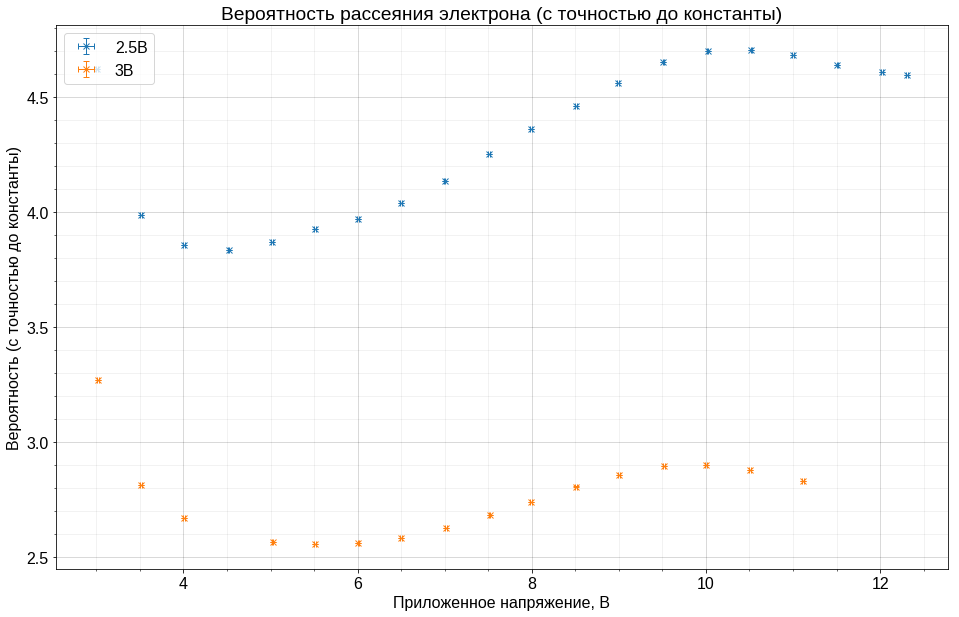

In [30]:
fig, ax = plt.subplots()

ax.set_title("Вероятность рассеяния электрона (с точностью до константы)")

fig.set_figheight(10)
fig.set_figwidth(16)

#ax.set_xscale('log', basex=10)
#ax.set_yscale('log', basey=10)

ax.grid(color='#000000', alpha=0.15, linestyle='-', linewidth=1, which='major')
ax.grid(color='#000000', alpha=0.1, linestyle='-', linewidth=0.5, which='minor')
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.errorbar(X_2_5V, probs_2_5V, xerr = delta_U, yerr = probs_2_5V_err,
            ls = '', lw = 1.0, marker = 'x', solid_capstyle='projecting', capsize = 3, label = '2.5В')

ax.errorbar(X_3V, probs_3V, xerr = delta_U, yerr = probs_3V_err,
            ls = '', lw = 1.0, marker = 'x', solid_capstyle='projecting', capsize = 3, label = '3В')

#ax.set_xlim(left = 2.0)

ax.set_xlabel('Приложенное напряжение, В')
ax.set_ylabel('Вероятность (с точностью до константы)')

ax.legend(loc='upper left')
plt.show();

В отличии от графиков токов, здесь уже лучше прослеживается подобие полученных множеств точек.

Здесь также хорошо видна тенденция к спаду вероятности до второго локального минимума, который достигнуть не удаётся по изложенным ранее причинам.

# Выводы

1. На основе экспериментальных данных об ионизационном потенциале установлено, что в лампе содержится криптон.

2. Построены вольт-амперные характеристики лампы в двух разных режимах ее работы.

3. На основе полученных вольт-амперных характеристик сделан вывод, что действительно наблюдается эффект Рамзауэра.

4. Получена грубая и две более точных оценки на радиус электронной оболочки атома. Итоговое значение - $ (3.0 \pm 0.4) \cdot 10^{-10} $ м. По порядку величины значение сошлось с табличными данными.

5. Сделаны оценки эффективной глубины потенциальной ямы атома в разных режимах работы лампы. Оказалось, что при напряжении накала $ 3 $ В глубина отрицательна. Возможно, это означает, что в данном режиме работы лампы атом ведет себя как барьер; возможно также, что это просто неточность опыта.

6. Построен график зависимости вероятности рассеяния электрона от приложенного напряжения. Данный график, возможно, косвенно подтверждает существование второго минимума вероятности, так как в его конце явно виден некоторый спад вероятности.